In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import plotly.express as px
import seaborn as sns


# Step 1: Define the API endpoint

In [2]:
api_endpoints = [
    "http://127.0.0.1:8000/api/patient/",
    "http://127.0.0.1:8000/api/patient-observation/",
    "http://127.0.0.1:8000/api/cancer-markers/",
    "http://127.0.0.1:8000/api/comorbidity/",  # Assuming this is one of your endpoints
    "http://127.0.0.1:8000/api/patient-histories/" # Assuming this is another one
    # Add any other endpoints you have
]

dataframes = {}

for url in api_endpoints:
    try:
        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        df = pd.json_normalize(data, sep='_')
        endpoint_name = url.split('/')[-2]
        dataframes[endpoint_name] = df
        print(f"Successfully fetched and stored data from: {url} as DataFrame '{endpoint_name}'")
        print(dataframes[endpoint_name].head())
        print("-" * 30)

    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch data from {url}. Error: {e}")
    except ValueError as e:
        print(f"Failed to parse JSON from {url}. Error: {e}")

# Assign DataFrames and reset index
if 'patient' in dataframes:
    patient_df = dataframes['patient'].reset_index(drop=True)
    print("\nPatient DataFrame (no index):")
    print(patient_df.head())

if 'patient-observation' in dataframes:
    obs_df = dataframes['patient-observation'].reset_index(drop=True)
    print("\nPatient Observation DataFrame (no index):")
    print(obs_df.head())

if 'cancer-markers' in dataframes:
    markers_df = dataframes['cancer-markers'].reset_index(drop=True)
    print("\nCancer Markers DataFrame (no index):")
    print(markers_df.head())

if 'comorbidity' in dataframes:
    comorbidity_df = dataframes['comorbidity'].reset_index(drop=True)
    print("\nComorbidity DataFrame (no index):")
    print(comorbidity_df.head())

if 'patient-histories' in dataframes:
    histories_df = dataframes['patient-histories'].reset_index(drop=True)
    print("\nPatient Histories DataFrame (no index):")
    print(histories_df.head())

print("\nAll API data fetched and DataFrames created without default index.")

Successfully fetched and stored data from: http://127.0.0.1:8000/api/patient/ as DataFrame 'patient'
   id        unique_id              name       phone date_of_birth  gender  \
0   1  BSBSC-230000001  EHSANI CHOWDHURY  1711040226    1971-04-18  Female   
1   2  BSBSC-230000002      NISHAT NAHAR  1924241969    1994-01-01  Female   
2   3  BSBSC-240000003  MRS. ARIFA BEGUM  1712777531    1996-12-26  Female   
3   4  BSBSC-240000004      NAZIA NAYEEM  1680549004    1990-11-01  Female   
4   5  BSBSC-240000005      FATEMA BAGUM  1917821797    1962-02-08  Female   

  blood_group      area police_station district socio_economic_status_name  \
0              Shyamoli         Adabor                  Upper middle class   
1                                                                      NaN   
2          B+    Jamgor                   Dhaka                Lower class   
3          A+   Borobag                   Dhaka         Upper middle class   
4                                       

In [3]:
obs_df.head()

,id,disease_progression_status,survival_status,clinical_response_rate_target_lasion,clinical_response_rate_non_target_lasion,clinical_response_rate_new_lasion,clinical_response_rate_result,radiological_response_rate_target_lasion,radiological_response_rate_non_target_lasion,radiological_response_rate_new_lasion,...,radiological_response_rate_result_name,diagnosis_laterility,line_of_treatment,diagnosis_subgroup,pathological_response_rate_target_lasion_name,pathological_response_rate_non_target_lasion_name,pathological_response_rate_new_lasion_name,pathological_response_rate_result_name,diagnosis_disease_group,diagnosis_primary_site
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
patient_df.head()

,id,unique_id,name,phone,date_of_birth,gender,blood_group,area,police_station,district,socio_economic_status_name,socio_economic_status
0,1,BSBSC-230000001,EHSANI CHOWDHURY,1711040226,1971-04-18,Female,,Shyamoli,Adabor,,Upper middle class,NaN
1,2,BSBSC-230000002,NISHAT NAHAR,1924241969,1994-01-01,Female,,,,,NaN,NaN
2,3,BSBSC-240000003,MRS. ARIFA BEGUM,1712777531,1996-12-26,Female,B+,Jamgor,,Dhaka,Lower class,NaN
3,4,BSBSC-240000004,NAZIA NAYEEM,1680549004,1990-11-01,Female,A+,Borobag,,Dhaka,Upper middle class,NaN
4,5,BSBSC-240000005,FATEMA BAGUM,1917821797,1962-02-08,Female,,,,,NaN,NaN


In [5]:
histories_df.shape

(19264, 28)

In [6]:
histories_df.head()

,contraceptive_method,regular_irregular_menstruation,breast_examination_value,family_member,age_of_marriage,age_of_first_child,age_of_menarche,age_of_menopause,breast_examination,excercise_per_week,...,cancer_history,known_mutation,first_diagnosis_date,smoking_history,smoking_packets_per_year,patient_observation_id,marital_status_name,marital_status,contraceptive_method_contraceptive_methods,regular_irregular_menstruation_name
0,NaN,NaN,None,None,NaN,NaN,NaN,None,,None,...,,,None,,None,1,Married,NaN,NaN,NaN
1,NaN,NaN,None,None,NaN,NaN,NaN,None,,None,...,,,None,,None,2,NaN,NaN,NaN,NaN
2,NaN,NaN,None,None,NaN,NaN,NaN,None,Self Examination,None,...,No,No,2020-09-26,No,None,5,Married,NaN,,Regular
3,NaN,NaN,None,None,NaN,NaN,NaN,None,,None,...,,,2022-01-14,,None,6,Married,NaN,NaN,NaN
4,NaN,NaN,None,None,NaN,NaN,NaN,None,Self Examination,None,...,NA,,2022-05-19,No,None,8,Married,NaN,NaN,NaN


In [7]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(histories_df):
    # Drop column: 'contraceptive_method'
    histories_df = histories_df.drop(columns=['contraceptive_method'])
    # Drop column: 'regular_irregular_menstruation'
    histories_df = histories_df.drop(columns=['regular_irregular_menstruation'])
    # Drop column: 'marital_status'
    histories_df = histories_df.drop(columns=['marital_status'])
    return histories_df

histories_df_clean = clean_data(histories_df.copy())
histories_df_clean.head()

,breast_examination_value,family_member,age_of_marriage,age_of_first_child,age_of_menarche,age_of_menopause,breast_examination,excercise_per_week,dietary_habit,height,...,rt_to_chest,cancer_history,known_mutation,first_diagnosis_date,smoking_history,smoking_packets_per_year,patient_observation_id,marital_status_name,contraceptive_method_contraceptive_methods,regular_irregular_menstruation_name
0,None,None,NaN,NaN,NaN,None,,None,,4.11,...,,,,None,,None,1,Married,NaN,NaN
1,None,None,NaN,NaN,NaN,None,,None,,NaN,...,,,,None,,None,2,NaN,NaN,NaN
2,None,None,NaN,NaN,NaN,None,Self Examination,None,,147.00,...,,No,No,2020-09-26,No,None,5,Married,,Regular
3,None,None,NaN,NaN,NaN,None,,None,,5.10,...,,,,2022-01-14,,None,6,Married,NaN,NaN
4,None,None,NaN,NaN,NaN,None,Self Examination,None,,140.00,...,,NA,,2022-05-19,No,None,8,Married,NaN,NaN


In [8]:
markers_df.head()

,name,value,unit,date,patient_observation_id
0,AFP,3.4,,2023-11-27,1
1,CA15.3,19.8,,2023-10-05,1
2,CA15.3,37.1,,2023-11-27,1
3,CA19.9,162.0,,2023-10-05,1
4,CA19.9,53.5,,2023-11-27,1


In [9]:
markers_df.shape

(732, 5)

In [10]:
merged_df_with_markers = pd.merge(obs_df, markers_df, left_on='id', right_on='patient_observation_id', how='left')  # 'left' join to keep all patient observations

In [11]:
merged_df_with_markers.columns


Index(['id', 'disease_progression_status', 'survival_status',
       'clinical_response_rate_target_lasion',
       'clinical_response_rate_non_target_lasion',
       'clinical_response_rate_new_lasion', 'clinical_response_rate_result',
       'radiological_response_rate_target_lasion',
       'radiological_response_rate_non_target_lasion',
       'radiological_response_rate_new_lasion',
       'radiological_response_rate_result',
       'pathological_response_rate_target_lasion',
       'pathological_response_rate_non_target_lasion',
       'pathological_response_rate_new_lasion',
       'pathological_response_rate_result', 'time', 'registration_number',
       'laterality', 'current_chemo_protocol', 'chemo_starting_date',
       'chemo_cycle_no', 'chemo_detail', 'disease_progression_status_date',
       'pfs', 'survival_status_date', 'overall_survival',
       'clinical_response_rate_date', 'radiological_response_rate_date',
       'pathological_response_rate_date', 'cancer_type', 'p

In [12]:
merged_df_with_markers.to_csv('merged_df_with_markers.csv', index=False)

In [13]:
comorbidity_df.head()

,patient_observation_id,name_name
0,675,T2DM
1,683,HTN
2,683,Hypo/Hyper thoiroidism
3,685,HTN
4,686,DM


In [14]:
markers_df.head()


,name,value,unit,date,patient_observation_id
0,AFP,3.4,,2023-11-27,1
1,CA15.3,19.8,,2023-10-05,1
2,CA15.3,37.1,,2023-11-27,1
3,CA19.9,162.0,,2023-10-05,1
4,CA19.9,53.5,,2023-11-27,1


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_patient_marker_timeseries(
    df,
    patient_id=None,
    plot=False,
    save_csv=False,
    output_dir='patient_marker_timeseries',
    marker_col='name',
    value_col='value',
    time_col='date'
):
    """
    Plot and/or save cancer marker values over time per patient.

    Parameters:
    - df (pd.DataFrame): DataFrame with marker data.
    - patient_id (int or str, optional): Patient ID to plot. If None, saves all.
    - plot (bool): Plot cancer marker trends for selected patient.
    - save_csv (bool): Save per-patient marker timeseries CSVs.
    - output_dir (str): Directory to save CSVs.
    - marker_col (str): Column with marker names.
    - value_col (str): Column with marker values.
    - time_col (str): Column with timestamp.
    """

    # Ensure time column is datetime
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

    # Filter out rows with missing key values
    df_filtered = df.dropna(subset=['patient_id_id', marker_col, value_col, time_col])

    # Sort
    df_sorted = df_filtered.sort_values(by=['patient_id_id', marker_col, time_col])
    grouped = df_sorted.groupby('patient_id_id')

    # # Save all time series to CSVs
    # if save_csv:
    #     os.makedirs(output_dir, exist_ok=True)
    #     for pid, group in grouped:
    #         group.to_csv(f"{output_dir}/patient_{pid}_marker_timeseries.csv", index=False)

    # Plot for a specific patient
    if plot and patient_id is not None:
        if patient_id not in grouped.groups:
            print(f"Patient ID {patient_id} not found.")
            return

        patient_df = grouped.get_group(patient_id)
        plt.figure(figsize=(12, 6))
        for marker, marker_df in patient_df.groupby(marker_col):
            plt.plot(marker_df[time_col], marker_df[value_col], marker='o', label=marker)

        plt.title(f"Cancer Marker Trends Over Time for Patient {patient_id}")
        plt.xlabel("Date")
        plt.ylabel("Marker Value")
        plt.legend(title='Marker Name', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


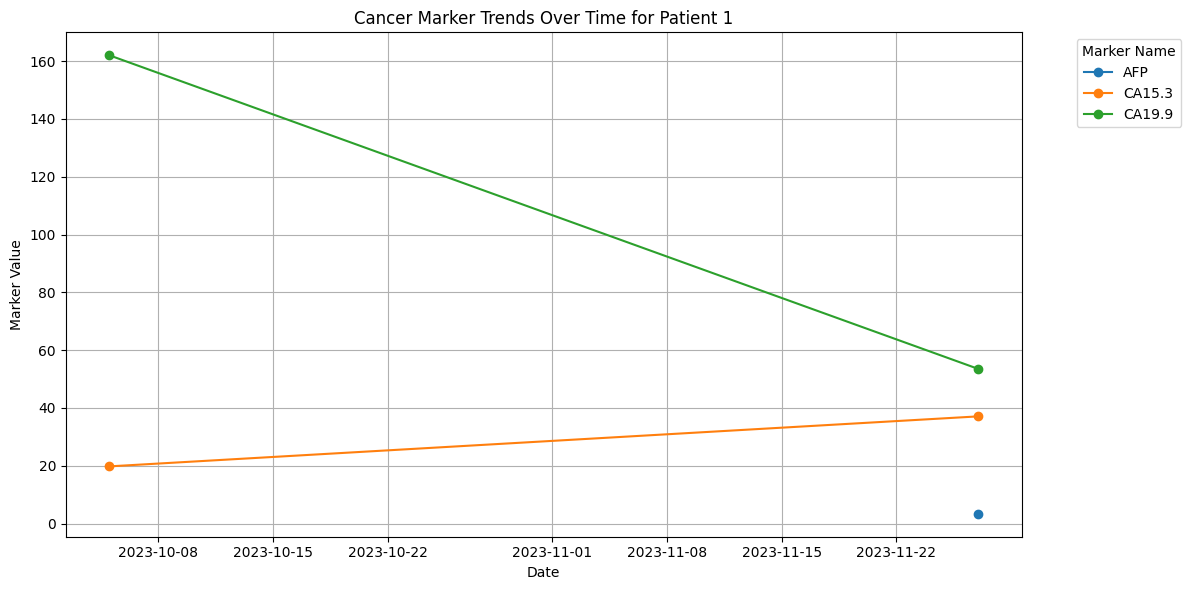

In [30]:
# Just plot cancer markers for one patient
plot_patient_marker_timeseries(merged_df_with_markers, patient_id=1, plot=True)

# Save all patient marker time series as CSVs
# plot_patient_marker_timeseries(merged_df_with_markers, save_csv=True)

In [33]:
plot_patient_marker_timeseries(merged_df_with_markers, patient_id=1023, plot=True, save_csv=True)

Patient ID 1023 not found.


In [18]:
import os
import django
import pandas as pd
import sys # Import sys module

# --- Add this section to set up the environment correctly ---

# Set the absolute path to your project root directory.
# This is the directory that contains manage.py AND the 'bsbcs' folder.
# Based on your manage.py location: E:\Django\breast\bsbcs\manage.py
project_root = r'E:\Django\breast\bsbcs' # Use r'' for raw string to handle backslashes

# Change the current working directory to the project root
# This is crucial so Python can find 'bsbcs'
os.chdir(project_root)

# Add the project root to sys.path (optional, but good practice)
if project_root not in sys.path:
    sys.path.append(project_root)

# --- End of Setup Fix ---


# 1. Set the Django settings module
# This should now work because the current directory is the project root
# and Python can find the 'bsbcs' package.
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'bsbcs.settings')

# 2. Configure Django
# This line initializes Django and loads your settings
django.setup()

# Print a success message to confirm setup
print("Django environment configured successfully.")

# Now you can proceed with importing your models from 'oncoedu'
# Example: from oncoedu.models import YourModel # Replace 'YourModel' with your actual model name

Django environment configured successfully.


In [19]:
# --- Initial Django Environment Setup (remains the same) ---
# Ensure this part runs successfully first to establish the database connection

import os
import django
import pandas as pd
import sys
from django.conf import settings
import mysql.connector

project_root = r'E:\Django\breast\bsbcs' # Your project root

os.chdir(project_root)

if project_root not in sys.path:
    sys.path.append(project_root)

os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'bsbcs.settings')
django.setup()

print("Django environment configured successfully for settings access.")

# --- Database Connection Setup (remains the same) ---
# This block establishes the connection that you will reuse

db_config = settings.DATABASES['default']

db_params = {
    'database': db_config['NAME'],
    'user': db_config['USER'],
    'password': db_config['PASSWORD'],
    'host': db_config['HOST'],
    'port': db_config['PORT'],
}

if not db_params['host']:
    db_params['host'] = 'localhost'
try:
    if db_params['port']:
        db_params['port'] = int(db_params['port'])
    else:
         db_params['port'] = 3306
except (ValueError, TypeError):
     db_params['port'] = 3306


connection = None # Initialize connection outside try block
p_obs_df = pd.DataFrame() # Initialize DataFrames outside try block
patient_df = pd.DataFrame()
can_marker_df = pd.DataFrame()


try:
    # Establish the database connection once
    connection = mysql.connector.connect(**db_params)
    print("Database connection established successfully.")

    # --- READ DATA FROM THE FIRST TABLE (PatientObservation) ---
    print("\nFetching data from oncoedu_patientobservation...")
    sql_query_obs = "SELECT * FROM oncoedu_patientobservation;"
    pt_obs_df = pd.read_sql(sql_query_obs, connection)
    print(f"Loaded {len(pt_obs_df)} rows from oncoedu_patientobservation.")
    print("PatientObservation DataFrame head:")
    print(pt_obs_df.head())


    # --- READ DATA FROM THE SECOND TABLE (Example: Patient Model) ---

    print("\nFetching data from oncoedu_Patientmodel...")
    sql_query_another = "SELECT * FROM oncoedu_patient;" # <--- REPLACE 'oncoedu_anothermodel'
    patient_df = pd.read_sql(sql_query_another, connection)
    print(f"Loaded {len(patient_df)} rows from oncoedu_Patientmodel.")
    print("Patient Model DataFrame head:")
    print(patient_df.head())

    # --- READ DATA FROM THE Patient Histories TABLE (Example: AnotherModel) ---

    print("\nFetching data from oncoedu_Patientmodel...")
    sql_query_another = "SELECT * FROM oncoedu_patienthistory;" # <--- REPLACE 'oncoedu_anothermodel'
    his_df = pd.read_sql(sql_query_another, connection)
    print(f"Loaded {len(his_df)} rows from oncoedu_patienthistory.")
    print("Patient History Model DataFrame head:")
    print(his_df.head())
    # --- READ DATA FROM THE Patient Cancer Marker TABLE (Example: AnotherModel) ---

    print("\nFetching data from oncoedu_Patientmodel...")
    sql_query_another = "SELECT * FROM oncoedu_cancermarker;" # <--- REPLACE 'oncoedu_anothermodel'
    can_marker_df = pd.read_sql(sql_query_another, connection)
    print(f"Loaded {len(can_marker_df)} rows from oncoedu_Cacer Marker")
    print("Patient History Model DataFrame head:")
    print(can_marker_df.head())


except mysql.connector.Error as err:
    print(f"Database error: {err}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    # --- Close the connection ONCE after all data is fetched ---
    if connection is not None and connection.is_connected():
        connection.close()
        print("\nDatabase connection closed.")

Django environment configured successfully for settings access.
Database connection established successfully.

Fetching data from oncoedu_patientobservation...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6192\3549791320.py:61: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pt_obs_df = pd.read_sql(sql_query_obs, connection)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6192\3549791320.py:71: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  patient_df = pd.read_sql(sql_query_another, connection)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6192\3549791320.py:80: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  his_df = pd.read_sql(sql_query_another, connection)


Loaded 1018 rows from oncoedu_patientobservation.
PatientObservation DataFrame head:
   id          created_at          updated_at  center_id_id  doctor_id_id  \
0   1 2023-12-18 07:13:21 2023-12-18 07:13:21             2             6   
1   2 2023-12-18 11:11:45 2023-12-18 11:11:45             2             6   
2   3 2024-01-14 07:22:06 2024-01-14 07:22:06             8            11   
3   4 2024-01-14 09:33:06 2024-01-14 09:33:06             8            11   
4   5 2024-03-28 11:47:49 2024-03-28 11:47:49             2             6   

   patient_id_id  grade_id laterality        registration_number  \
0              1       2.0                    BSH - H12310382162   
1              2       2.0                             BSH - 001   
2              3       2.0       Left  Prof SALMA - H12312401532   
3              4       2.0       Left  Prof SALMA - H12201224235   
4              5       NaN       Left         BSH - H12110197955   

                 time  ... pathological_res

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6192\3549791320.py:88: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  can_marker_df = pd.read_sql(sql_query_another, connection)


In [20]:
pt_obs_df.head()

,id,created_at,updated_at,center_id_id,doctor_id_id,patient_id_id,grade_id,laterality,registration_number,time,...,pathological_response_rate_result_id,pathological_response_rate_target_lasion_id,pfs,radiological_response_rate_date,radiological_response_rate_new_lasion_id,radiological_response_rate_non_target_lasion_id,radiological_response_rate_result_id,radiological_response_rate_target_lasion_id,survival_status_id,survival_status_date
0,1,2023-12-18 07:13:21,2023-12-18 07:13:21,2,6,1,2.0,,BSH - H12310382162,2023-12-18 07:13:21,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
1,2,2023-12-18 11:11:45,2023-12-18 11:11:45,2,6,2,2.0,,BSH - 001,2023-12-18 11:11:45,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
2,3,2024-01-14 07:22:06,2024-01-14 07:22:06,8,11,3,2.0,Left,Prof SALMA - H12312401532,2024-01-14 07:22:06,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
3,4,2024-01-14 09:33:06,2024-01-14 09:33:06,8,11,4,2.0,Left,Prof SALMA - H12201224235,2024-01-14 09:33:06,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
4,5,2024-03-28 11:47:49,2024-03-28 11:47:49,2,6,5,NaN,Left,BSH - H12110197955,2024-03-28 11:47:49,...,NaN,NaN,None,2024-03-28,5.0,5.0,2.0,4.0,1.0,2024-03-28


In [21]:
# --- Initial Django Environment Setup (remains necessary) ---
# Ensure this part runs successfully first

import os
import django
import pandas as pd
import sys
from django.conf import settings
# You will need to import ALL models that PatientObservation has foreign keys to
from oncoedu.models import (
    PatientObservation, Patient, Doctor, Center, TumourGrade,
    DiseaseProgressionStatus, SurvivalStatus, LineOfTreatmentRecords,
    DiagnosisDiseaseGroupRecords, DiagnosisDiseaseSubGroupRecords,
    DiagnosisPrimarySiteRecords, DiagnosisLaterality,
    ClinicalResponseRateTargetLesion, ClinicalResponseRateNonTargetLesion,
    ClinicalResponseRateNewLesion, ClinicalResponseRateResult,
    RadiologicalResponseRateTargetLesion, RadiologicalResponseRateNonTargetLesion,
    RadiologicalResponseRateNewLesion, RadiologicalResponseRateResult,
    PathologicalResponseRateTargetLesion, PathologicalResponseRateNonTargetLesion,
    PathologicalResponseRateNewLesion, PathologicalResponseRateResult
)

# Import necessary async helpers
from asgiref.sync import sync_to_async
import asyncio # Needed to run async functions in some notebook environments

project_root = r'E:\Django\breast\bsbcs' #  project root
os.chdir(project_root)
if project_root not in sys.path:
    sys.path.append(project_root)

os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'bsbcs.settings')
django.setup()

print("Django environment configured successfully.")
print("Models imported.")

# --- Async Function to Fetch Data using Django ORM ---
print("\nSetting up async data fetching function...")

# Define an async function to encapsulate the synchronous ORM calls
async def fetch_patient_observations_with_fk_strings():
    """
    Fetches PatientObservation data using ORM and builds a list of dicts
    with foreign key string representations.
    Runs synchronous ORM calls safely using sync_to_async.
    """
    print("Executing ORM query inside async wrapper...")
    # Use select_related to fetch related objects efficiently
    # CORRECTED field name 'diagnosis_laterility'
    try:
        observations_queryset = PatientObservation.objects.select_related(
            'patient_id',
            'doctor_id',
            'center_id',
            'grade',
            'disease_progression_status',
            'survival_status',
            'line_of_treatment',
            'diagnosis_disease_group',
            'diagnosis_subgroup',
            'diagnosis_primary_site',
            'diagnosis_laterility', # CORRECT FIELD NAME
            'clinical_response_rate_target_lasion',
            'clinical_response_rate_non_target_lasion',
            'clinical_response_rate_new_lasion',
            'clinical_response_rate_result',
            'radiological_response_rate_target_lasion',
            'radiological_response_rate_non_target_lasion',
            'radiological_response_rate_new_lasion',
            'radiological_response_rate_result',
            'pathological_response_rate_target_lasion',
            'pathological_response_rate_non_target_lasion',
            'pathological_response_rate_new_lasion',
            'pathological_response_rate_result'
            # Double-check for any duplicated or incorrect field names based on your model
        )

        # Use sync_to_async to execute the synchronous QuerySet evaluation (.all())
        # This runs the database query in a separate thread
        observations = await sync_to_async(list)(observations_queryset)

        print(f"Fetched {len(observations)} PatientObservation objects via ORM.")

        # --- Manually build list of dictionaries for DataFrame (still inside async function) ---
        data_for_df = []
        for obs in observations:
            row = {
                # Include direct fields from PatientObservation
                'id': obs.id,
                'time': obs.time,
                'registration_number': obs.registration_number,
                'laterality': obs.laterality, # This is a CharField
                'current_chemo_protocol': obs.current_chemo_protocol,
                'chemo_starting_date': obs.chemo_starting_date,
                'chemo_cycle_no': obs.chemo_cycle_no,
                'chemo_detail': obs.chemo_detail,
                'disease_progression_status_date': obs.disease_progression_status_date,
                'pfs': obs.pfs,
                'survival_status_date': obs.survival_status_date,
                'overall_survival': obs.overall_survival,
                'clinical_response_rate_date': obs.clinical_response_rate_date,
                'radiological_response_rate_date': obs.radiological_response_rate_date,
                'pathological_response_rate_date': obs.pathological_response_rate_date,
                'cancer_type': obs.cancer_type,
                'created_at': obs.created_at,
                'updated_at': obs.updated_at,

                # Include string representations of foreign keys
                # Use str(obs.fk_field) or obs.fk_field.display_field if fk_field is not None
                # Use a ternary operator (if condition else) to handle NULL foreign keys gracefully
                # Use the CORRECT field name from the model when accessing the related object
                'patient_name': str(obs.patient_id) if obs.patient_id else None,
                'doctor_name': str(obs.doctor_id) if obs.doctor_id else None,
                'center_name': str(obs.center_id) if obs.center_id else None,
                'grade_display': str(obs.grade) if obs.grade else None,
                'disease_progression_status_display': str(obs.disease_progression_status) if obs.disease_progression_status else None,
                'survival_status_display': str(obs.survival_status) if obs.survival_status else None,
                'line_of_treatment_display': str(obs.line_of_treatment) if obs.line_of_treatment else None,
                'diagnosis_disease_group_display': str(obs.diagnosis_disease_group) if obs.diagnosis_disease_group else None,
                'diagnosis_subgroup_display': str(obs.diagnosis_subgroup) if obs.diagnosis_subgroup else None,
                'diagnosis_primary_site_display': str(obs.diagnosis_primary_site) if obs.diagnosis_primary_site else None,
                'diagnosis_laterality_display': str(obs.diagnosis_laterility) if obs.diagnosis_laterility else None, # CORRECTED ACCESS FIELD NAME
                'clinical_response_rate_target_lasion_display': str(obs.clinical_response_rate_target_lasion) if obs.clinical_response_rate_target_lasion else None,
                'clinical_response_rate_non_target_lasion_display': str(obs.clinical_response_rate_non_target_lasion) if obs.clinical_response_rate_non_target_lasion else None,
                'clinical_response_rate_new_lasion_display': str(obs.clinical_response_rate_new_lasion) if obs.clinical_response_rate_new_lasion else None,
                'clinical_response_rate_result_display': str(obs.clinical_response_rate_result) if obs.clinical_response_rate_result else None,
                'radiological_response_rate_target_lasion_display': str(obs.radiological_response_rate_target_lasion) if obs.radiological_response_rate_target_lasion else None,
                'radiological_response_rate_non_target_lasion_display': str(obs.radiological_response_rate_non_target_lasion) if obs.radiological_response_rate_non_target_lasion else None,
                'radiological_response_rate_new_lasion_display': str(obs.radiological_response_rate_new_lasion) if obs.radiological_response_rate_new_lasion else None,
                'radiological_response_rate_result_display': str(obs.radiological_response_rate_result) if obs.radiological_response_rate_result else None,
                'pathological_response_rate_target_lasion_display': str(obs.pathological_response_rate_target_lasion) if obs.pathological_response_rate_target_lasion else None,
                'pathological_response_rate_non_target_lasion_display': str(obs.pathological_response_rate_non_target_lasion) if obs.pathological_response_rate_non_target_lasion else None,
                'pathological_response_rate_new_lasion_display': str(obs.pathological_response_rate_new_lasion) if obs.pathological_response_rate_new_lasion else None,
                'pathological_response_rate_result_display': str(obs.pathological_response_rate_result) if obs.pathological_response_rate_result else None,
            }
            data_for_df.append(row)

        return data_for_df # Return the list of dictionaries

    except Exception as e:
        print(f"Error during async ORM fetch or processing: {e}")
        raise # Re-raise the exception after printing

# --- Run the async function and create DataFrame ---

print("\nRunning async fetch function...")

try:
    # Use asyncio.run() if in a script or standalone context that doesn't have a running loop
    # In some notebook environments, you might just 'await' directly
    # Check your notebook environment. If 'await' at the top level works, use that.
    # If not, use asyncio.run() or get_event_loop().run_until_complete().
    # 'await' is often simpler if your environment supports top-level await.

    # --- Option 1: If your notebook supports top-level await ---
    # data_for_pandas = await fetch_patient_observations_with_fk_strings()

    # --- Option 2: If you need to explicitly run the async function ---
    # Ensure you don't get "RuntimeError: This event loop is already running"
    loop = asyncio.get_event_loop()
    if loop.is_running():
         # If loop is already running (common in notebooks), just await
         data_for_pandas = await fetch_patient_observations_with_fk_strings()
    else:
         # If no loop is running, run the async function until complete
         data_for_pandas = loop.run_until_complete(fetch_patient_observations_with_fk_strings())


    print("Async fetch complete.")

    # --- Create DataFrame from the collected data ---
    p_obs_df = pd.DataFrame(data_for_pandas)

    print("\nDataFrame head (ORM method with FK strings):")
    print(p_obs_df.head())

except Exception as e:
    print(f"An error occurred after async fetch: {e}")
    # import traceback
    # traceback.print_exc()


# --- (No explicit connection closing needed with ORM usually) ---

Django environment configured successfully.
Models imported.

Setting up async data fetching function...

Running async fetch function...
Executing ORM query inside async wrapper...
Fetched 1018 PatientObservation objects via ORM.
Async fetch complete.

DataFrame head (ORM method with FK strings):
   id                      time        registration_number laterality  \
0   1 2023-12-18 07:13:21+00:00         BSH - H12310382162              
1   2 2023-12-18 11:11:45+00:00                  BSH - 001              
2   3 2024-01-14 07:22:06+00:00  Prof SALMA - H12312401532       Left   
3   4 2024-01-14 09:33:06+00:00  Prof SALMA - H12201224235       Left   
4   5 2024-03-28 11:47:49+00:00         BSH - H12110197955       Left   

                              current_chemo_protocol chemo_starting_date  \
0                                                             2023-12-09   
1                                                                   None   
2  Dose Dense Paclitaxel + Carbopl

In [22]:
p_obs_df.head()

,id,time,registration_number,laterality,current_chemo_protocol,chemo_starting_date,chemo_cycle_no,chemo_detail,disease_progression_status_date,pfs,...,clinical_response_rate_new_lasion_display,clinical_response_rate_result_display,radiological_response_rate_target_lasion_display,radiological_response_rate_non_target_lasion_display,radiological_response_rate_new_lasion_display,radiological_response_rate_result_display,pathological_response_rate_target_lasion_display,pathological_response_rate_non_target_lasion_display,pathological_response_rate_new_lasion_display,pathological_response_rate_result_display
0,1,2023-12-18 07:13:21+00:00,BSH - H12310382162,,,2023-12-09,4.0,,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,2023-12-18 11:11:45+00:00,BSH - 001,,,None,4.0,,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,2024-01-14 07:22:06+00:00,Prof SALMA - H12312401532,Left,Dose Dense Paclitaxel + Carboplatin followed ...,2024-01-06,8.0,,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,2024-01-14 09:33:06+00:00,Prof SALMA - H12201224235,Left,Weekly Paclitaxel + Weekly Carboplatin,2024-01-04,4.0,Weekly Paclitaxel + Weekly carboplatin Followe...,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,2024-03-28 11:47:49+00:00,BSH - H12110197955,Left,o Palbociclib + Letrozole + Zoladex 3.6mg C1 s...,2022-09-29,NaN,Started palliative ChT with AC + Zoledronic C1...,2024-03-28,None,...,No,PD,PD,Non-PD,Yes,PR,None,None,None,None


In [23]:
observation_df = p_obs_df.copy()

In [24]:
observation_df.head()

,id,time,registration_number,laterality,current_chemo_protocol,chemo_starting_date,chemo_cycle_no,chemo_detail,disease_progression_status_date,pfs,...,clinical_response_rate_new_lasion_display,clinical_response_rate_result_display,radiological_response_rate_target_lasion_display,radiological_response_rate_non_target_lasion_display,radiological_response_rate_new_lasion_display,radiological_response_rate_result_display,pathological_response_rate_target_lasion_display,pathological_response_rate_non_target_lasion_display,pathological_response_rate_new_lasion_display,pathological_response_rate_result_display
0,1,2023-12-18 07:13:21+00:00,BSH - H12310382162,,,2023-12-09,4.0,,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,2023-12-18 11:11:45+00:00,BSH - 001,,,None,4.0,,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,2024-01-14 07:22:06+00:00,Prof SALMA - H12312401532,Left,Dose Dense Paclitaxel + Carboplatin followed ...,2024-01-06,8.0,,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,2024-01-14 09:33:06+00:00,Prof SALMA - H12201224235,Left,Weekly Paclitaxel + Weekly Carboplatin,2024-01-04,4.0,Weekly Paclitaxel + Weekly carboplatin Followe...,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,2024-03-28 11:47:49+00:00,BSH - H12110197955,Left,o Palbociclib + Letrozole + Zoladex 3.6mg C1 s...,2022-09-29,NaN,Started palliative ChT with AC + Zoledronic C1...,2024-03-28,None,...,No,PD,PD,Non-PD,Yes,PR,None,None,None,None


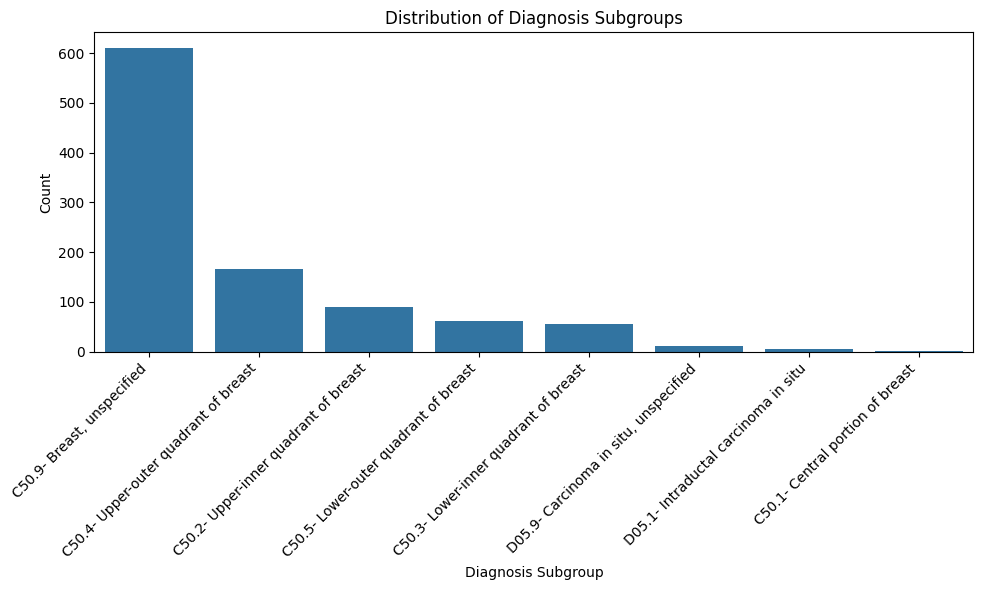

In [25]:
observation_df['diagnosis_subgroup_display'].value_counts()
diagnosis_subgroup_counts = observation_df['diagnosis_subgroup_display'].value_counts().reset_index()
diagnosis_subgroup_counts.head()
plt.figure(figsize=(10, 6))
sns.barplot(x='diagnosis_subgroup_display', y='count', data=diagnosis_subgroup_counts)
plt.xlabel('Diagnosis Subgroup')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis Subgroups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6192\2404971440.py:31: UserWarning: Glyph 2 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6192\2404971440.py:31: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
e:\Django\breast\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


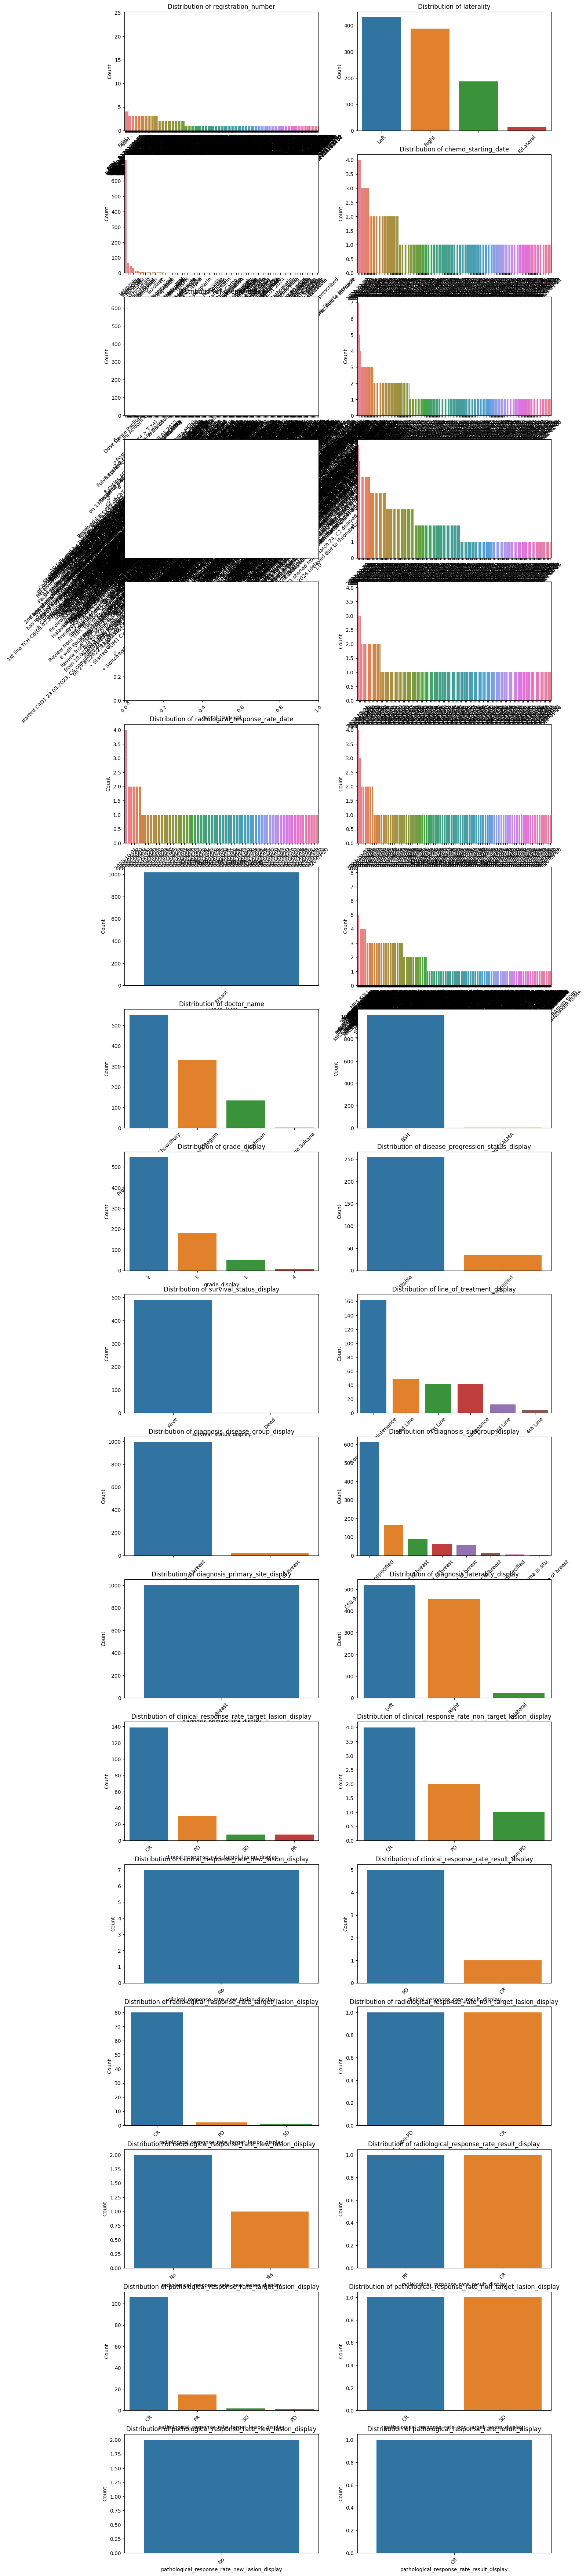

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns (excluding numeric ones)
categorical_columns = observation_df.select_dtypes(include=['object']).columns

# Determine grid size
num_cols = len(categorical_columns)
rows = (num_cols // 2) + (num_cols % 2)  # Adjust rows for a balanced grid

# Create a large figure with multiple subplots
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily loop over

# Loop through categorical columns and plot on subplots
for i, col in enumerate(categorical_columns):
    counts_df = observation_df[col].value_counts().reset_index()
    counts_df.columns = [col, 'count']
    
    sns.barplot(x=col, y='count', hue=col, data=counts_df, legend=False, ax=axes[i])
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if there are odd columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

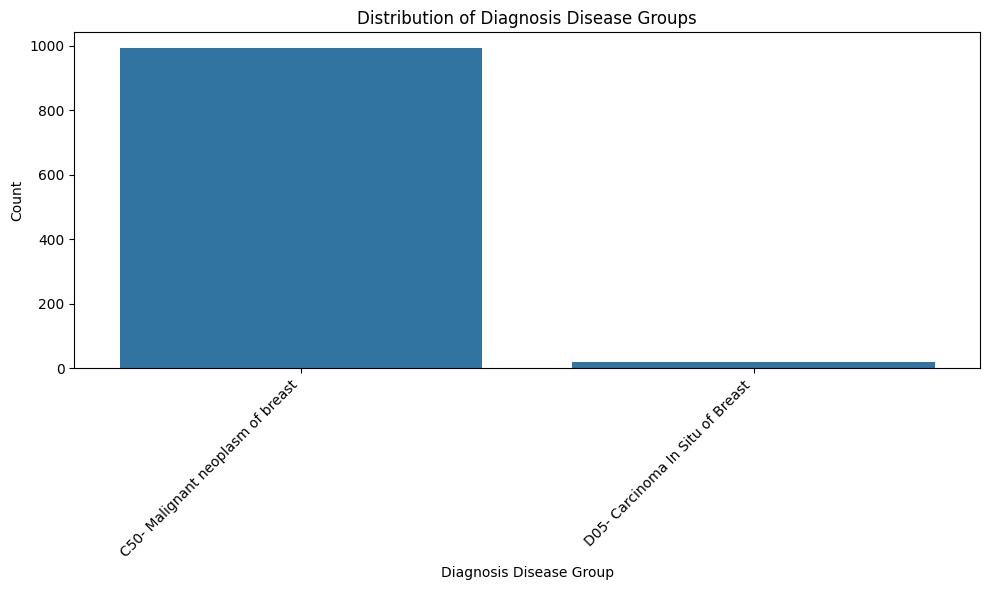

In [27]:
diagnosis_group_counts = observation_df['diagnosis_disease_group_display'].value_counts().reset_index() 
diagnosis_group_counts.head()
plt.figure(figsize=(10, 6))
sns.barplot(x='diagnosis_disease_group_display', y='count', data=diagnosis_group_counts)
plt.xlabel('Diagnosis Disease Group')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis Disease Groups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
p_obs_df.head()
patient_df.head()
his_df.head()
can_marker_df.head()

,id,patient_observation_id_id,value,unit,date,created_at,updated_at,name_id
0,1,1,3.4,,2023-11-27,2023-12-18 07:13:21,2023-12-18 07:13:21,10
1,2,1,19.8,,2023-10-05,2023-12-18 07:13:21,2023-12-18 07:13:21,6
2,3,1,37.1,,2023-11-27,2023-12-18 07:13:21,2023-12-18 07:13:21,6
3,4,1,162.0,,2023-10-05,2023-12-18 07:13:21,2023-12-18 07:13:21,8
4,5,1,53.5,,2023-11-27,2023-12-18 07:13:21,2023-12-18 07:13:21,8


In [29]:
patient_df.head()

,id,unique_id,name,phone,email,nid,date_of_birth,gender,blood_group,area,police_station,district,photo,passport,created_at,updated_at,socio_economic_status_id
0,1,BSBSC-230000001,EHSANI CHOWDHURY,1711040226,,,1971-04-18,Female,,Shyamoli,Adabor,,,,2023-12-18 07:13:21,2023-12-18 07:13:21,2.0
1,2,BSBSC-230000002,NISHAT NAHAR,1924241969,,,1994-01-01,Female,,,,,,,2023-12-18 11:11:45,2023-12-18 11:11:45,NaN
2,3,BSBSC-240000003,MRS. ARIFA BEGUM,1712777531,,,1996-12-26,Female,B+,Jamgor,,Dhaka,,,2024-01-14 07:22:06,2024-01-14 07:22:06,5.0
3,4,BSBSC-240000004,NAZIA NAYEEM,1680549004,,,1990-11-01,Female,A+,Borobag,,Dhaka,,,2024-01-14 09:33:06,2024-01-14 09:33:06,2.0
4,5,BSBSC-240000005,FATEMA BAGUM,1917821797,,,1962-02-08,Female,,,,,,,2024-03-28 11:47:49,2024-05-06 12:27:07,NaN
